## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

The data required for this project would mostly consist of factors such as the chemicals used in the process of making a certain type of wine and chemical properties which are obtained from certain types of lab tests .In addition to that data and knowledge from wine experts can also be gathered to determine the factors for grading certain types of wines because these individuals posses a vast knowledge which can be very important in determining the quality of certain wines . 



### Data Collection

**Q3. From where do we get our data?**


<li>Surveys from Wine experts who can grade the quality of the wines using their experience and the sense of taste . </li>

<li>Data from labotorary tests performed on different types of wines so that it can be used to identify the differernt types of chemicals in the wine. </li>

<li>Other physio chemical parameters can be obtained from tests performed directly on wine samples obvatined from producers and also distributers  </li>





### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

The red wine samples are obtained from red and white vinho verde wine samples from the north of Portugal from the city of Guimarães. Associate Professor Paulo Coeortez was involved in the data collection for this data set. 

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

 The understanding obtained from studying this dataset and how each of the variables affect the quality of the red wine would allow producers to improve on how they produce each type of red wine in their factories because they could reasses which chemicals to be used when producing the red wine. 
 
 In addition to the distributors would can gain a good understanding how the red wine should be distributed like for example determing which temperature the red wine should be kept when transporting the red wine . The distributors also can gain knowledge on how the wines could be priced and then sold to the customers. 
 
 </n>

<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary </li>

In [84]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

wine_sample = pd.read_csv('winequality-red.csv')

wine_sample.head


<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [85]:
wine_sample.shape

(1599, 12)

In [86]:
wine_sample.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Data Preparation

#### Explore the dataset further


<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

In [87]:
wine_sample.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In the dataset there are no missing values as the counts for each individual features are same which is 1599 . Next we can check for outliers using boxplots which will show the devitations for each of the features. 

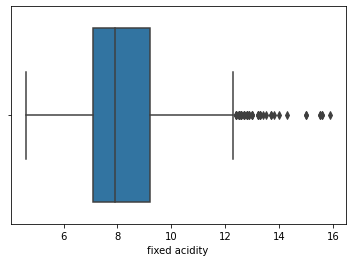

In [88]:
sns.boxplot(x=wine_sample['fixed acidity'])

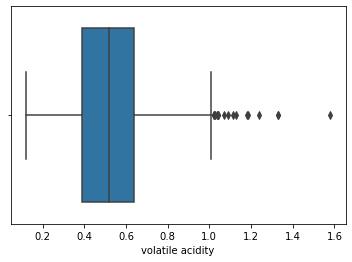

In [89]:
sns.boxplot(x=wine_sample['volatile acidity'])

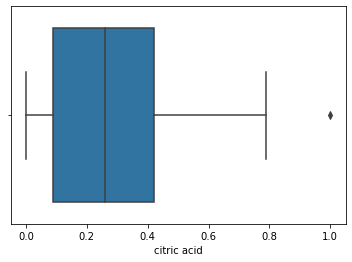

In [90]:
sns.boxplot(x=wine_sample['citric acid'])

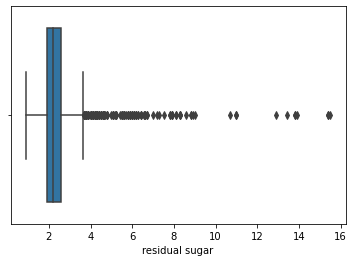

In [91]:
sns.boxplot(x=wine_sample['residual sugar'])

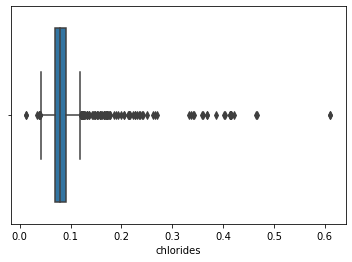

In [92]:
sns.boxplot(x=wine_sample['chlorides'])

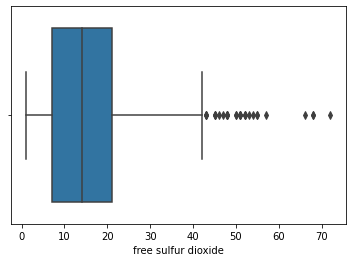

In [93]:
sns.boxplot(x=wine_sample['free sulfur dioxide'])

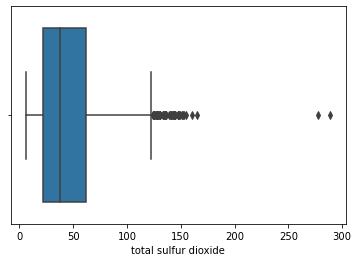

In [94]:
sns.boxplot(x=wine_sample['total sulfur dioxide'])

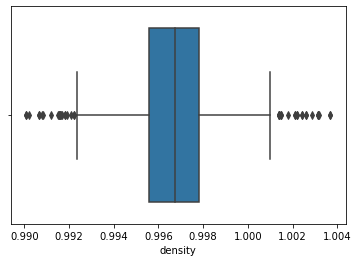

In [95]:
sns.boxplot(x=wine_sample['density'])

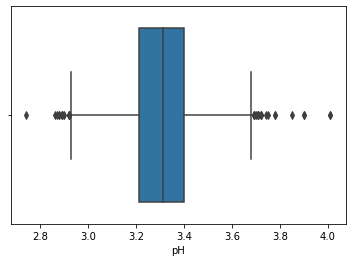

In [96]:
sns.boxplot(x=wine_sample['pH'])

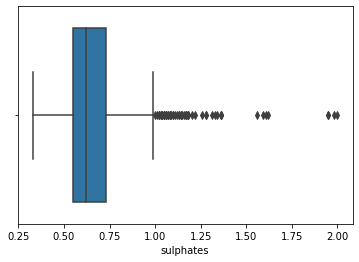

In [97]:
sns.boxplot(x=wine_sample['sulphates'])

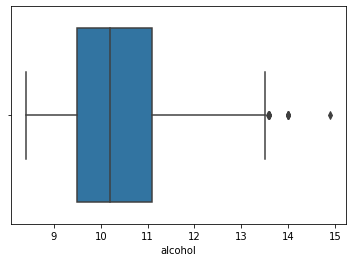

In [98]:
sns.boxplot(x=wine_sample['alcohol'])

We can clearly see in the plots above that each feature does have a few outliers which are present in them. Therefore we can use z score method to determine outliers which can have a direct impact on the predictions made from the models . 

In [99]:
from scipy.stats import zscore

z=abs(zscore(wine_sample))


print(z.shape)


(1599, 12)


In [100]:
wine_sample=wine_sample[(z<3).all(axis=1)]


In [101]:
wine_sample.shape

(1451, 12)

In [102]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

# Splitting the dataset into train,validation and test dataset 
from sklearn.model_selection import train_test_split

%matplotlib inline



wine_sample.groupby('quality').mean()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
4,7.923404,0.682447,0.159787,2.504255,0.080191,12.340426,34.297872,0.996669,3.377234,0.574043,10.162766
5,8.115559,0.568720,0.235284,2.361183,0.083611,16.009724,53.521880,0.997005,3.316451,0.596791,9.914100
6,8.368771,0.500563,0.268379,2.319113,0.081232,15.061433,38.534130,0.996627,3.320017,0.661843,10.599204
7,8.812973,0.409649,0.369459,2.636757,0.076005,13.194595,31.237838,0.996086,3.293622,0.741027,11.489279
8,8.981250,0.419375,0.423125,2.662500,0.070500,12.000000,29.062500,0.995707,3.224375,0.766250,11.856250


Next we perform correlation matrix to find which of the features are positively and negatively correlated with the quality 

In [103]:
print(wine_sample.corr())


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.297150     0.698363   
volatile acidity          -0.297150          1.000000    -0.589452   
citric acid                0.698363         -0.589452     1.000000   
residual sugar             0.180293          0.025977     0.184960   
chlorides                  0.183549          0.072709     0.100361   
free sulfur dioxide       -0.148815          0.013943    -0.074441   
total sulfur dioxide      -0.099928          0.110338     0.005301   
density                    0.659927         -0.004957     0.371729   
pH                        -0.705572          0.251343    -0.520311   
sulphates                  0.200371         -0.348126     0.302815   
alcohol                   -0.015114         -0.213213     0.168766   
quality                    0.145163         -0.353443     0.243999   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

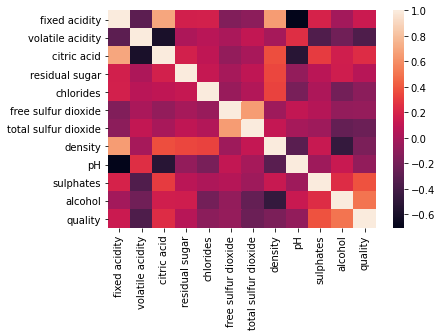

In [124]:

sns.heatmap(wine_sample.corr(), 
        xticklabels=wine_sample.columns,
        yticklabels=wine_sample.columns)


Next we plot the features with the use of histograms which can be used gain an understanding on how the features have distributed its values

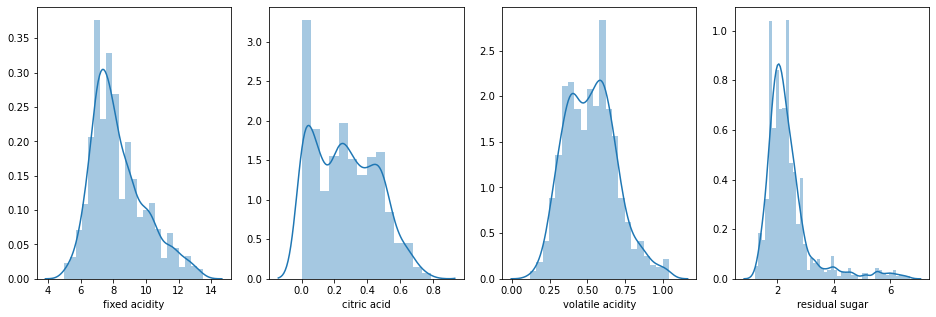

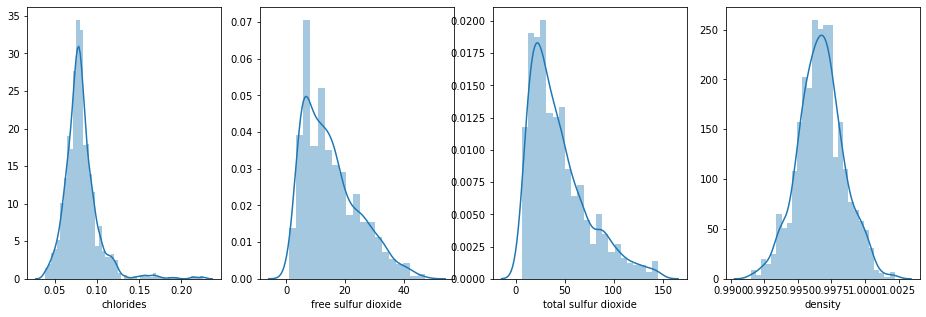

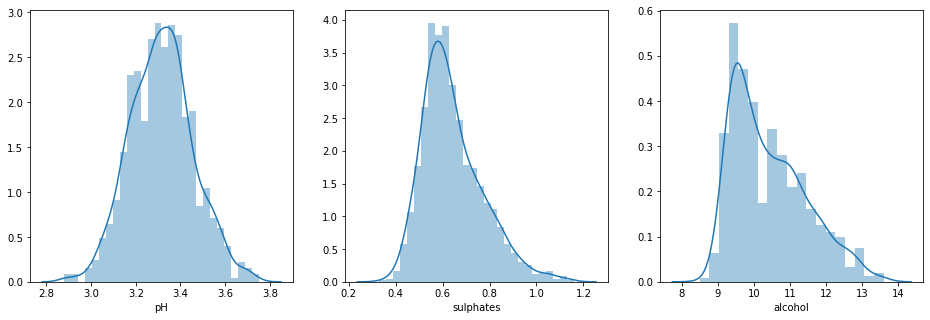

In [105]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
sns.distplot(wine_sample['fixed acidity'])
plt.subplot(1,4,2)
sns.distplot(wine_sample['citric acid'])
plt.subplot(1,4,3)
sns.distplot(wine_sample['volatile acidity'])
plt.subplot(1,4,4)
sns.distplot(wine_sample['residual sugar'])
plt.show()
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
sns.distplot(wine_sample['chlorides'])
plt.subplot(1,4,2)
sns.distplot(wine_sample['free sulfur dioxide'])
plt.subplot(1,4,3)
sns.distplot(wine_sample['total sulfur dioxide'])
plt.subplot(1,4,4)
sns.distplot(wine_sample['density'])
plt.show()
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(wine_sample['pH'])
plt.subplot(1,3,2)
sns.distplot(wine_sample['sulphates'])
plt.subplot(1,3,3)
sns.distplot(wine_sample['alcohol'])
plt.show()

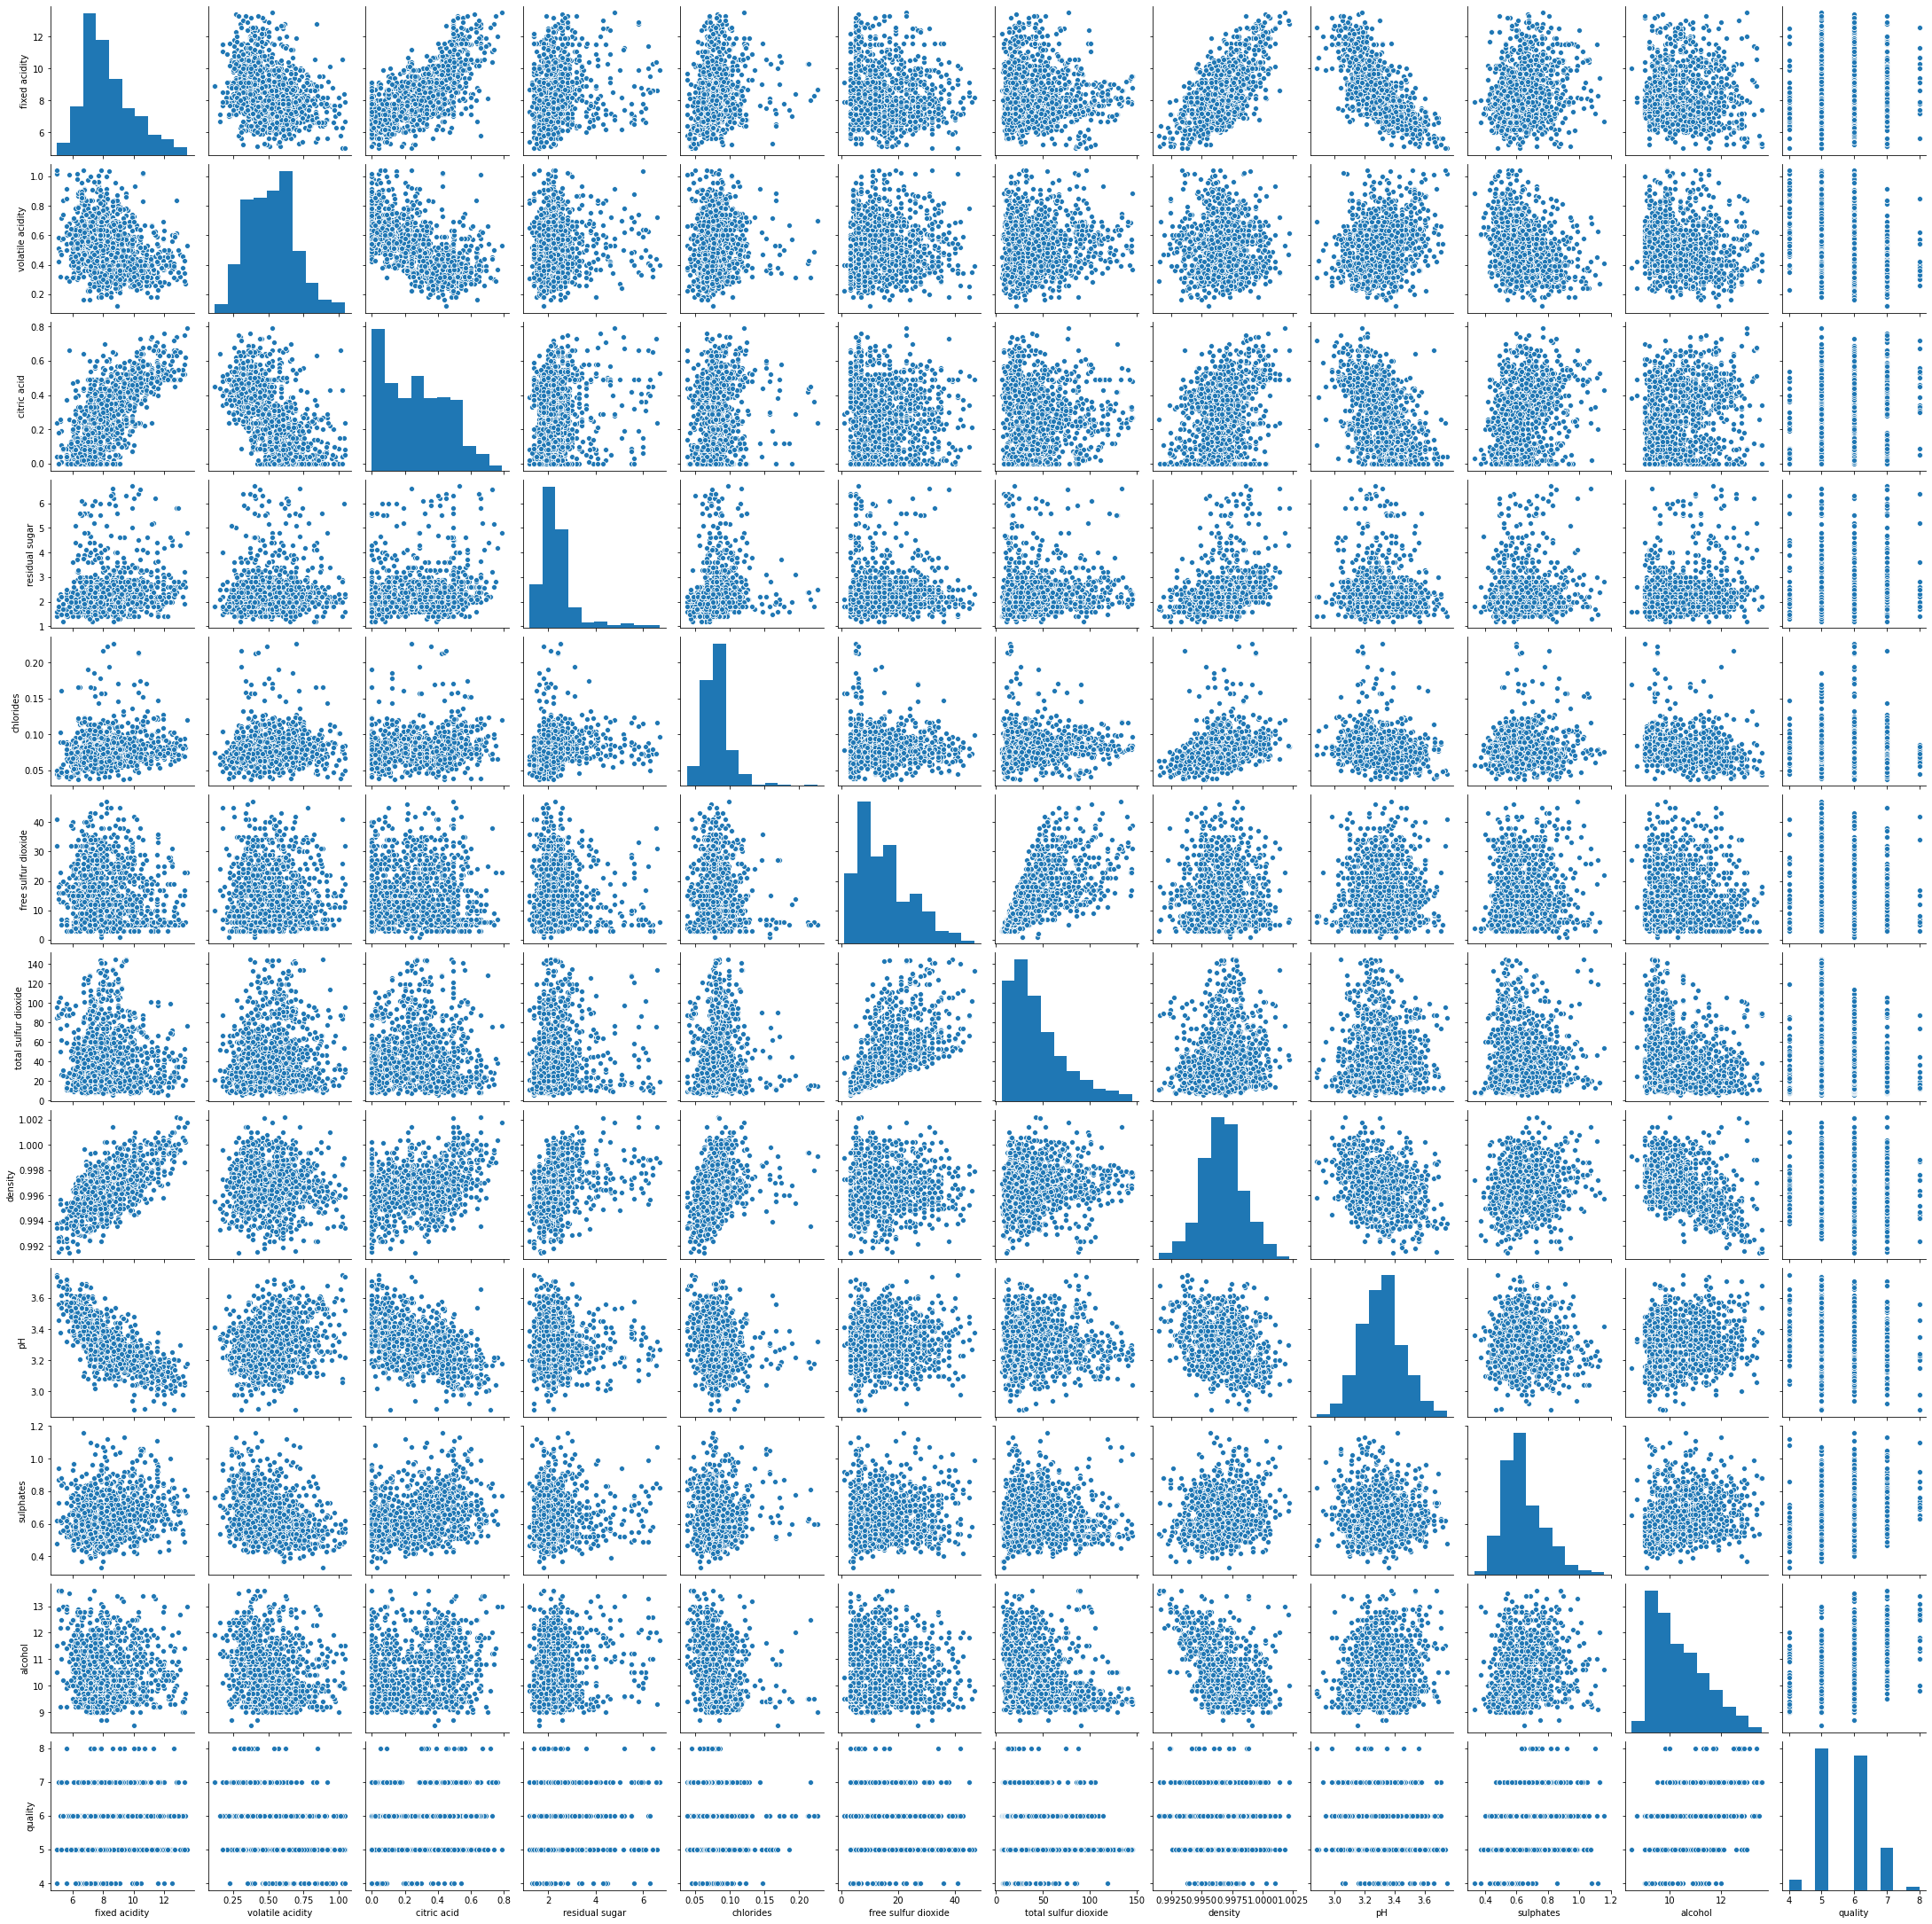

In [106]:
sns.pairplot(wine_sample)

Then the features and labels for the dataset is spilt into a dataframe and Numpy array so that we can use this dataset to create models .

In [107]:

features = wine_sample.drop('quality', axis=1)
labels = wine_sample['quality']
features


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Modeling

<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

In [108]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [109]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib
lr =  LinearRegression()
parameters = {
    'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]
}

cv = GridSearchCV(lr, parameters, cv=5)

cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'copy_X': True, 'fit_intercept': False, 'normalize': True}

0.374 (+/-0.054) for {'copy_X': True, 'fit_intercept': True, 'normalize': True}
0.374 (+/-0.054) for {'copy_X': True, 'fit_intercept': True, 'normalize': False}
0.375 (+/-0.053) for {'copy_X': True, 'fit_intercept': False, 'normalize': True}
0.375 (+/-0.053) for {'copy_X': True, 'fit_intercept': False, 'normalize': False}
0.374 (+/-0.054) for {'copy_X': False, 'fit_intercept': True, 'normalize': True}
0.374 (+/-0.054) for {'copy_X': False, 'fit_intercept': True, 'normalize': False}
0.375 (+/-0.053) for {'copy_X': False, 'fit_intercept': False, 'normalize': True}
0.375 (+/-0.053) for {'copy_X': False, 'fit_intercept': False, 'normalize': False}


In [111]:
cv.best_estimator_

joblib.dump(cv.best_estimator_, 'LR_model.pkl')

['LR_model.pkl']

In [112]:
#Support Vector Machine Regressor 
from sklearn.linear_model import Lasso

ls =  Lasso()
parameters = {
    'alpha': [0, 1, 0.01]
}

cv = GridSearchCV(ls, parameters, cv=5)

cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'alpha': 0}

0.374 (+/-0.054) for {'alpha': 0}
0.053 (+/-0.038) for {'alpha': 1}
0.357 (+/-0.041) for {'alpha': 0.01}


In [113]:
cv.best_estimator_
joblib.dump(cv.best_estimator_, 'LS_model.pkl')

['LS_model.pkl']

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/


<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

In [114]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
from time import time


def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    mse = round(mean_squared_error(labels, pred),3)
    r2 = round(r2_score(labels, pred), 3)
    mae = round(mean_absolute_error(labels, pred), 3)
    print('{} -- Mean Squared Error: {} / R Squared Error : {} / Mean Absolute Error: {} / Latency: {}ms'.format(name,
                                                                                   mse,
                                                                                   r2,
                                                                                   mae,
                                                                                   round((end - start)*1000, 1)))


In [115]:
models = {}

for mdl in ['LR', 'LS']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [116]:

for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)


LR -- Mean Squared Error: 0.447 / R Squared Error : 0.334 / Mean Absolute Error: 0.519 / Latency: 1.5ms
LS -- Mean Squared Error: 0.447 / R Squared Error : 0.334 / Mean Absolute Error: 0.518 / Latency: 1.5ms


In [117]:

for name, mdl in models.items():
    evaluate_model(name, mdl, X_test, y_test)

LR -- Mean Squared Error: 0.419 / R Squared Error : 0.332 / Mean Absolute Error: 0.505 / Latency: 1.0ms
LS -- Mean Squared Error: 0.418 / R Squared Error : 0.334 / Mean Absolute Error: 0.503 / Latency: 1.0ms


Now if we compare the 2 models which is using the 3 metrics we defined , we can see that Both Lasso Regression and Linear Regression produces similar mean squared errror , R squared erro and Mean Absolute Error to have very similar values. The performance of these models are also have very minute gap of 0.1ms which would not make a big difference as both models are suitable to be used when determining which of the features can be used to predict the quality of red wine.

Next we move onto to determine which of the features are important for having high quality wines . We can use coeff values to define the importance of each feature for the 2 models which we have used. 

In [118]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [119]:
from sklearn.datasets import make_regression
from matplotlib import pyplot

importance = models['LS'].coef_    
print(importance)   
for i,v in enumerate(importance):
     print('Feature: %0d, Score: %.5f' % (i,v))


[ 1.34324829e-02 -7.25268524e-01 -1.10291064e-01  5.52782387e-03
 -1.12285003e+00  5.20100785e-03 -4.15741481e-03 -9.03039955e+00
 -6.70366245e-01  1.34184497e+00  2.92522458e-01]
Feature: 0, Score: 0.01343
Feature: 1, Score: -0.72527
Feature: 2, Score: -0.11029
Feature: 3, Score: 0.00553
Feature: 4, Score: -1.12285
Feature: 5, Score: 0.00520
Feature: 6, Score: -0.00416
Feature: 7, Score: -9.03040
Feature: 8, Score: -0.67037
Feature: 9, Score: 1.34184
Feature: 10, Score: 0.29252


In [120]:
importance = models['LR'].coef_    
print(importance)   
for i,v in enumerate(importance):
     print('Feature: %0d, Score: %.5f' % (i,v))


[ 1.17084819e-03 -7.30873149e-01 -1.10905056e-01 -2.47822752e-03
 -1.21606088e+00  5.30845198e-03 -4.20936144e-03  4.70135062e+00
 -7.36953063e-01  1.32275257e+00  3.05040538e-01]
Feature: 0, Score: 0.00117
Feature: 1, Score: -0.73087
Feature: 2, Score: -0.11091
Feature: 3, Score: -0.00248
Feature: 4, Score: -1.21606
Feature: 5, Score: 0.00531
Feature: 6, Score: -0.00421
Feature: 7, Score: 4.70135
Feature: 8, Score: -0.73695
Feature: 9, Score: 1.32275
Feature: 10, Score: 0.30504


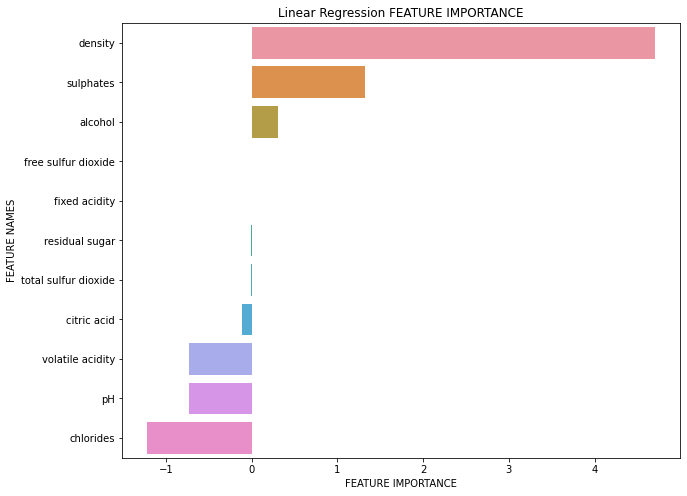

In [121]:
plot_feature_importance(models['LR'].coef_ ,X_train.columns,'Linear Regression ')

In the above plot we can clearly see that density , sulphates and the amount of alcohol present in the red wine can be identified as the features which will contribute to having good quality wine. The plot above represent this for the Linear Regression Model.

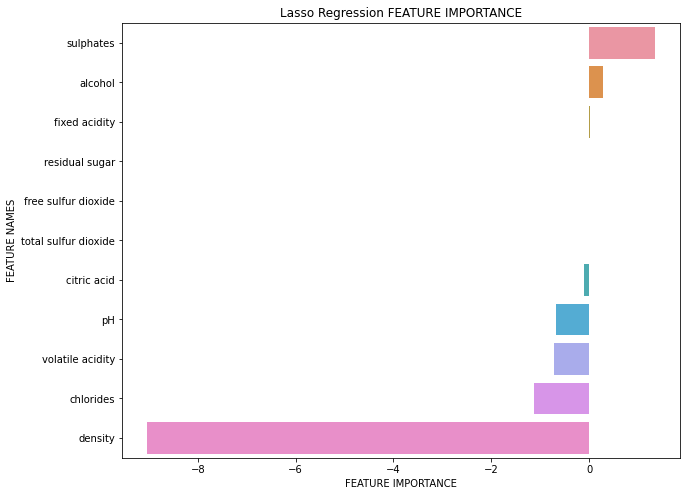

In [122]:
plot_feature_importance(models['LS'].coef_ ,X_train.columns,'Lasso Regression ')

However in the Lasso Regression Model, the feature density is not identified as important feature and it has a negative importance value . But sulphates and the amount of alcohol present in the red wine can be a determining factor for good quality red wine.

### Conclusion
In conclusion, the Both Lasso and Linear Regression model have very similar performance and error metrics for the dataset and can be used to predict good quality wine. Similar performance means that we are able to directly compare the importance values for the features which we have found out. Therefore we can identify that the 2 most important features for good quality wine are 

1. sulphates - Can be identified as the most important feature as it has high values of importance in both models 
2. alcohol 

If we compare this outcome with the correlation matrix we can clearly see that the sulphates and the amount of alcohol has the highest correlation with the quality of the red wine

In addition to this other features such as fixed acidity and the amount of citric acid present in the wine as least important features and have a very small impact on the quality of the wine.
The outcome of this project depends on the methods used to remove certain outliers and if the outliers can have an impact on different features. For example, the density feature could be affected by a certain outlier for the lasso regression model which may have impacted why it has reduced its importance in the lasso regression model. 